In [7]:
import numpy as np 
import pandas as pd 
import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt

In [8]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras

In [9]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size = (200,200)

In [10]:
def load_data():
    datasets = ['Train/Train', 'Test/Test', 'Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = "archive/" + dataset +"/Annotations"
        directoryIMG = "archive/" + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
      #  labels = pd.DataFrame(labels)
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output

In [11]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

In [12]:
train_images.shape
test_images.shape

(235, 200, 200, 3)

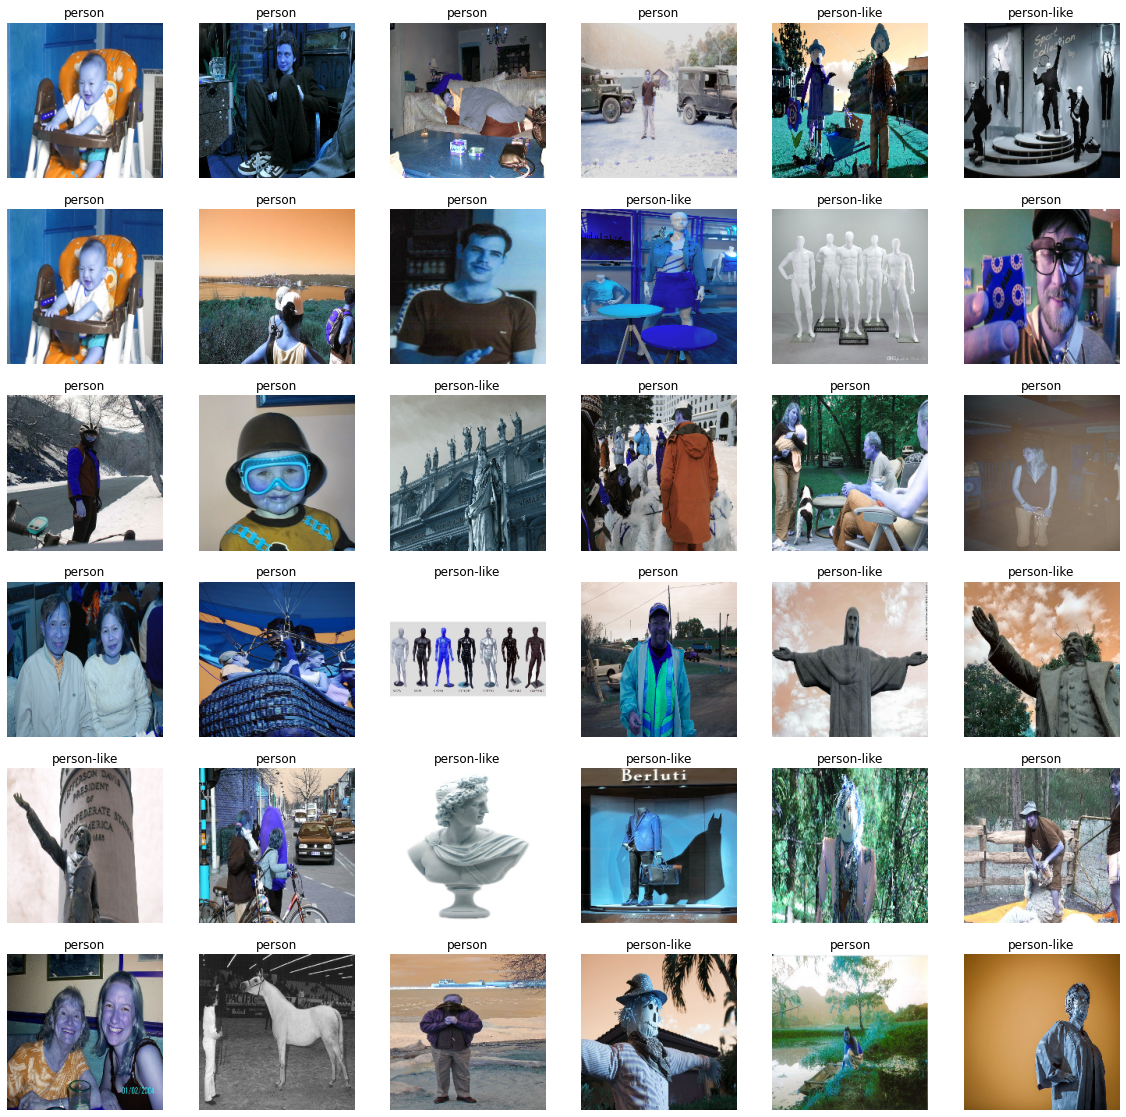

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])  
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Dropout(0.8))

In [38]:
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(train_images, train_labels, epochs=6, 
                    validation_data=(test_images, test_labels))

Epoch 1/6
30/30 [==============================] - 9s 284ms/step - loss: 1.2429 - accuracy: 0.5572 - val_loss: 0.6783 - val_accuracy: 0.5830
Epoch 2/6
30/30 [==============================] - 9s 299ms/step - loss: 0.5632 - accuracy: 0.7108 - val_loss: 0.6834 - val_accuracy: 0.6298
Epoch 3/6
30/30 [==============================] - 10s 319ms/step - loss: 0.4158 - accuracy: 0.8252 - val_loss: 0.6960 - val_accuracy: 0.6043
Epoch 4/6
30/30 [==============================] - 10s 335ms/step - loss: 0.2421 - accuracy: 0.8994 - val_loss: 0.8668 - val_accuracy: 0.5915
Epoch 5/6
30/30 [==============================] - 9s 317ms/step - loss: 0.1087 - accuracy: 0.9650 - val_loss: 1.0936 - val_accuracy: 0.6468
Epoch 6/6
30/30 [==============================] - 10s 335ms/step - loss: 0.1201 - accuracy: 0.9693 - val_loss: 1.3326 - val_accuracy: 0.6596
